## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

## Import data - EDA - Manipulate Data

In [2]:
s = "../data/kc_house_data.csv"
print('From local House path:', s)
df_housesales = pd.read_csv(s,
                            encoding='utf-8')
df_housesales.head()

From local House path: ../data/kc_house_data.csv


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#df_housesales.isnull().sum()

In [3]:
df_housesales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df_housesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Tranform Date to year, month and Drop id, Date
df_housesales['date'] = pd.to_datetime(df_housesales['date'])
df_housesales['year'] = df_housesales['date'].apply(lambda date: date.year)
df_housesales['month'] = df_housesales['date'].apply(lambda date: date.month)

# dropping
df_housesales.drop(['id', 'date'], axis = 1, inplace = True)

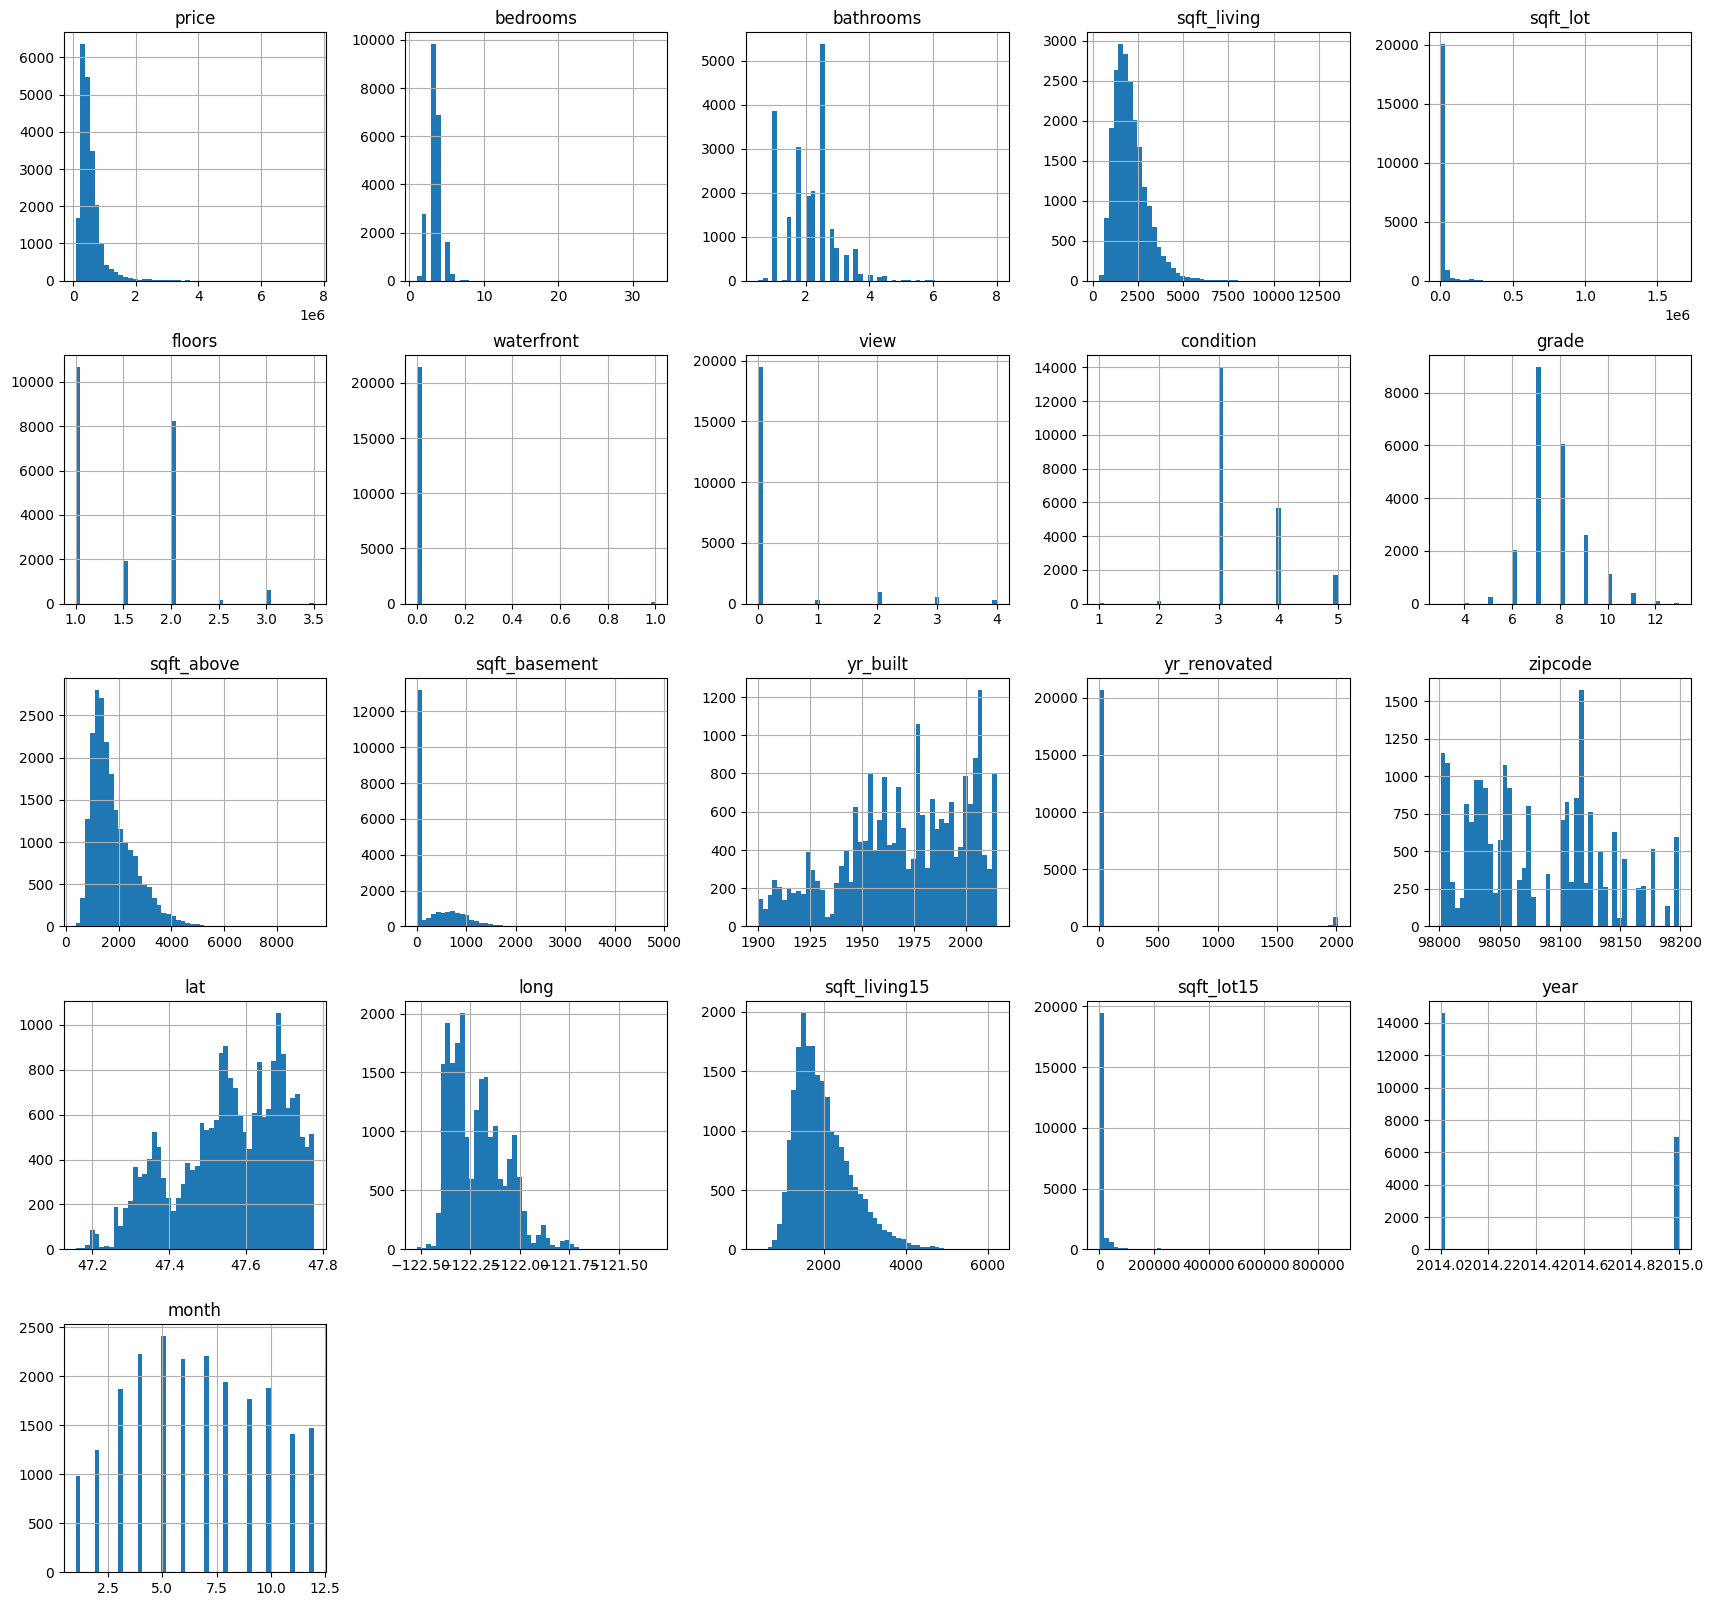

In [6]:
df_housesales.hist(bins=50, figsize=(21, 20))
plt.show();

### Explore

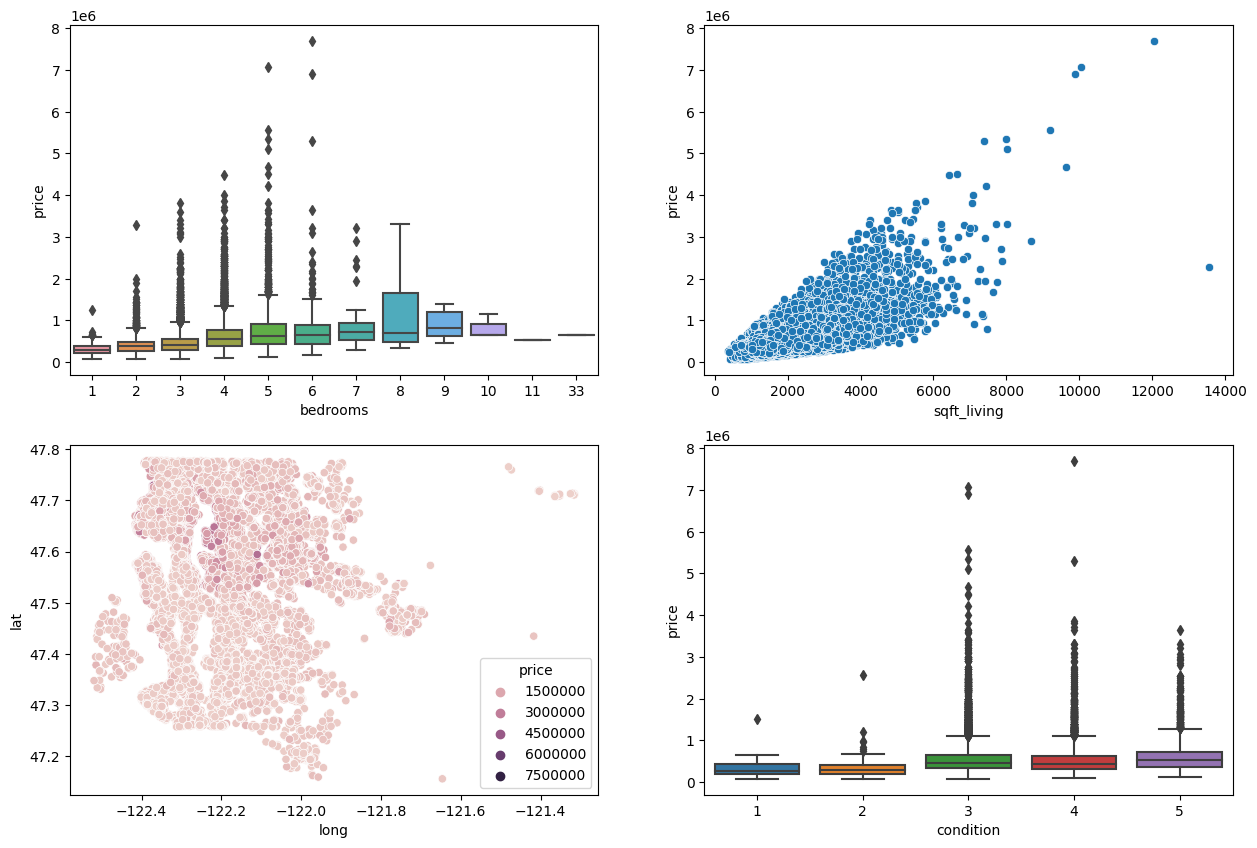

In [7]:
f,ax = plt.subplots(2,2, figsize = (15,10))
y = 'price'
sns.boxplot(x='condition', y=y, data=df_housesales , ax = ax[1,1])
sns.scatterplot(x='sqft_living',y=y ,data=df_housesales , ax = ax[0,1])
sns.scatterplot(x='long',y='lat',hue=y ,data=df_housesales , ax = ax[1,0])
sns.boxplot(x='bedrooms',y=y ,data=df_housesales , ax = ax[0,0]);

### Normalizing data

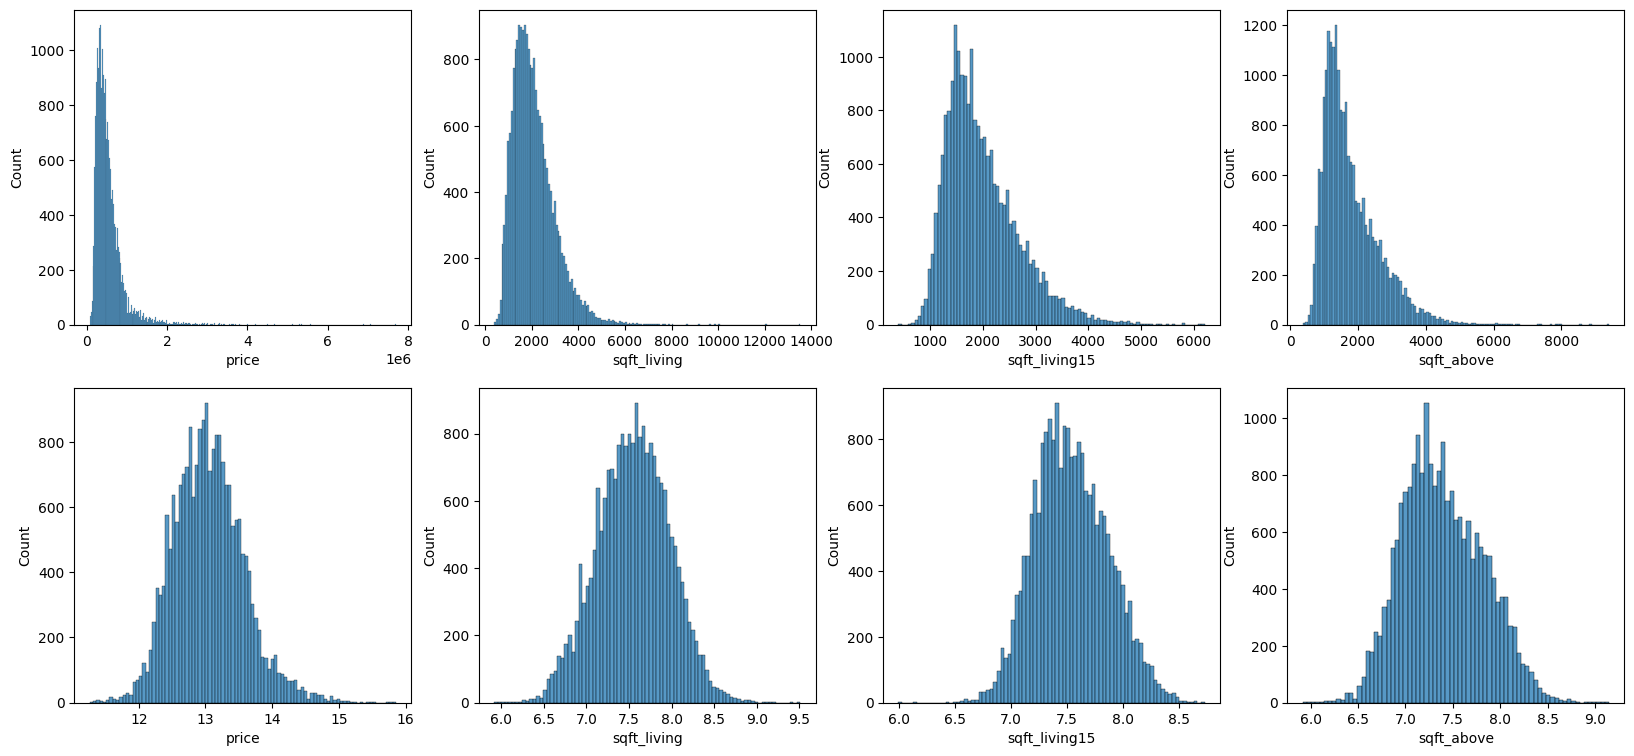

In [8]:
# Before Normalizing

f, ax = plt.subplots(2, 4, figsize = (20, 9))
y = 'price'
sns.histplot(df_housesales['price'], ax = ax[0, 0])
sns.histplot(df_housesales['sqft_living'], ax = ax[0, 1])
sns.histplot(df_housesales['sqft_living15'], ax = ax[0, 2])
sns.histplot(df_housesales['sqft_above'], ax = ax[0, 3]);

# Indetify numerical and categorical columns
numerical = df_housesales.select_dtypes(['int64', 'float64'])
categorical = df_housesales.select_dtypes('object')

# Skew
skw = numerical.skew().abs().sort_values(ascending = True)  # skew the data set
columns_skw = skw.loc[skw>0.75]                             # find those skewed to the right

# After Normalizing
for i in columns_skw.index:
  if i not in ['year','long']:
    df_housesales[i]= np.log1p(df_housesales[i]).astype('float')

sns.histplot(df_housesales['price'], ax = ax[1,0])
sns.histplot(df_housesales['sqft_living'], ax = ax[1,1])
sns.histplot(df_housesales['sqft_living15'], ax = ax[1,2])
sns.histplot(df_housesales['sqft_above'], ax = ax[1,3]);

### Finding Coorelation between variables

In [7]:
FC = numerical.corr() # Features Correlation
Target = numerical.corr()['price'].to_frame().reset_index() #Feature Correlation related to SalePrice
FR = FC.unstack().to_frame(name='Correlation') # Feature Relation
Feature = FR[(FR['Correlation']>=0.8)&(FR['Correlation']<1)].sort_values(by='Correlation', ascending = False).reset_index()
Final  = Feature.merge(Target,left_on='level_1', right_on='index')
#print("In thisdata set these columns are strongly related , i will usually take one and drop the other one but in this case i will keep it ")
Final

,level_0,level_1,Correlation,index,price
0,sqft_living,sqft_above,0.876448,sqft_above,0.605368
1,sqft_above,sqft_living,0.876448,sqft_living,0.701917


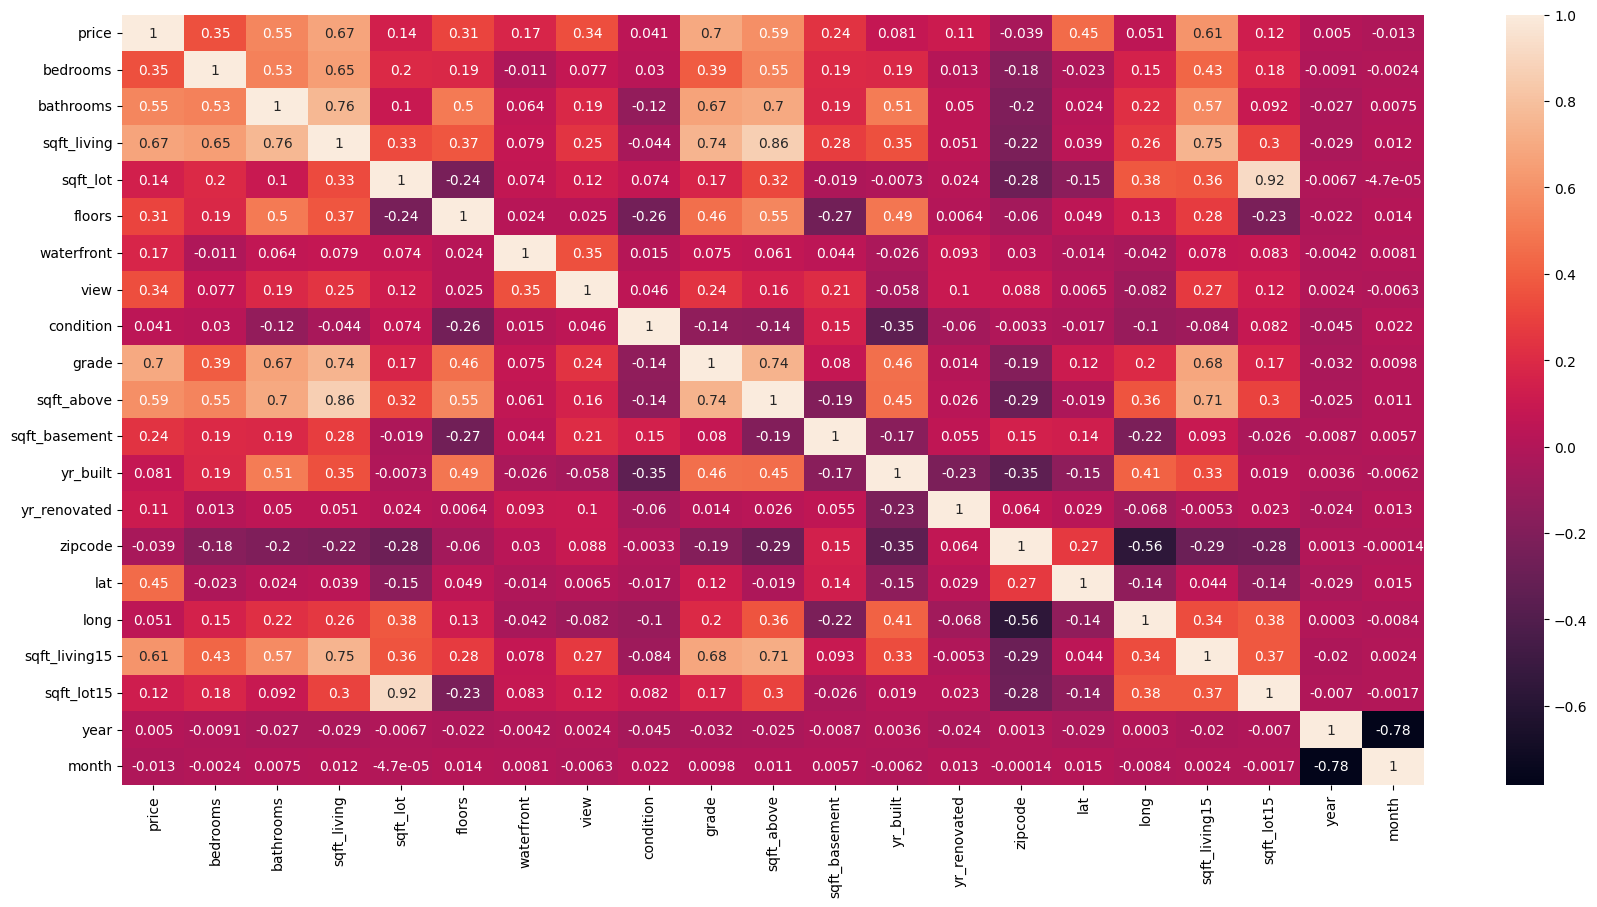

In [8]:
plt.figure(figsize=(21,10))
corr_matrix = df_housesales.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show();

## Split data

In [16]:
X = df_housesales.drop(['price'], axis = 1)
y = df_housesales['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

## Scalling

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

In [19]:
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.33, random_state=123)

In [25]:
y_train

array([12.9598468 , 13.39999663, 13.19923367, ..., 13.36138185,
       12.46844076, 13.11231506])

In [26]:
y_train_std

array([-0.16782457,  0.66810168,  0.28681555, ...,  0.59476505,
       -1.1010959 ,  0.12174097])

## Simple Linear Regression

In [20]:
slr = LinearRegression()

In [21]:
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

## Plot Residual error

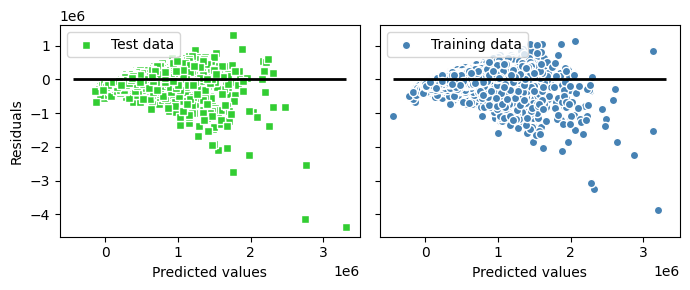

In [25]:
x_max = np.max(
    [np.max(y_train_pred), np.max(y_test_pred)]
)
x_min = np.min(
    [np.min(y_train_pred), np.min(y_test_pred)]
)

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(7, 3), sharey=True
)
ax1.scatter(
    y_test_pred, y_test_pred - y_test,
    c='limegreen', marker='s',
    edgecolor='white',
    label='Test data'
)
ax2.scatter(
    y_train_pred, y_train_pred - y_train,
    c='steelblue', marker='o', edgecolor='white',
    label='Training data'
)
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,\
              color='black', lw=2)

plt.tight_layout()
plt.show()

### Evaluate model by MSE

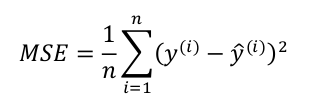

In [26]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 38595792134.62
MSE test: 43754002308.67


### Evaluate model by MAE

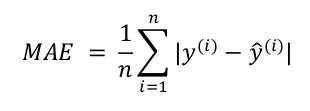

In [27]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 124350.83
MAE test: 126711.83


### Evaluate model by R^2: coefficient of determination

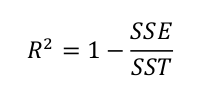

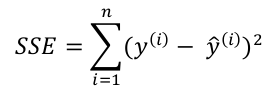

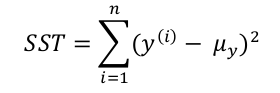

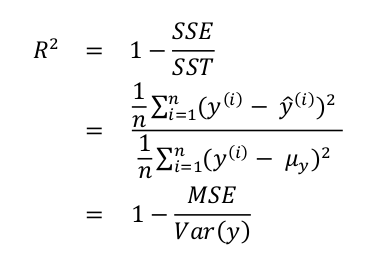

In [28]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, {test_r2:.3f}')

R^2 train: 0.709, 0.687


### Regularized methods: Ridge, Lasso, Elastic net

Model dang du doan lech TB $126,711 so vs TB

In [ ]:
##

In [8]:
X_train.shape, X_test.shape

((14469, 20), (7128, 20))

In [9]:
def regr_metrics(act, pred):
    return (math.sqrt(metrics.mean_absolute_error(act, pred)), metrics.mean_squared_error(act, pred))

## Factorization

Adding column [1 ... 1]

In [10]:
X_train_int = np.c_[X_train, np.ones(X_train.shape[0])]
X_test_int = np.c_[X_test, np.ones(X_test.shape[0])]

### Naive approach

We want to find $\hat{x}$ that minimizes: 
$$ \big\vert\big\vert Ax - b \big\vert\big\vert_2$$

Another way to think about this is that we are interested in where vector $b$ is closest to the subspace spanned by $A$ (called the *range of* $A$).  This is the projection of $b$ onto $A$.  Since $b - A\hat{x}$ must be perpendicular to the subspace spanned by $A$, we see that

$$A^T (b - A\hat{x}) = 0 $$

(we are using $A^T$ because we want to multiply each column of $A$ by $b - A\hat{x}$

This leads us to the *normal equations*:
$$ x = (A^TA)^{-1}A^T b $$

In [23]:
def ls_naive(A, b):
    return np.linalg.inv(A.T @ A) @ A.T @ b

In [24]:
%timeit coeffs_naive = ls_naive(X_train_int, y_train)

1.09 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [28]:
coeffs_naive = ls_naive(X_train_int, y_train)
regr_metrics(y_test, X_test_int @ coeffs_naive)

(0.4415911787360291, 0.06440169957478974)

In [59]:
coeffs_naive

array([  -0.1556,    0.0716,    0.137 ,    0.0192,    0.0515,    0.6924,
          0.1297,    0.2855,    1.4069,    0.209 ,    0.0139,   -0.0039,
          0.0084,   -0.0006,    1.3583,   -0.0867,    0.2331,   -0.0409,
          0.0648,    0.0026, -133.4136])

### Normal Equations (Cholesky)

Normal equations:
$$ A^TA x = A^T b $$

If $A$ has full rank, the pseudo-inverse $(A^TA)^{-1}A^T$ is a **square, hermitian positive definite** matrix.  The standard way of solving such a system is *Cholesky Factorization*, which finds upper-triangular R s.t. $A^TA = R^TR$.

In [37]:
A = X_train_int
b = y_train

In [31]:
AtA = A.T @ A
Atb = A.T @ b

In [35]:
R = scipy.linalg.cholesky(AtA)
np.set_printoptions(suppress=True, precision=4)

In [36]:
np.linalg.norm(AtA - R.T @ R)

0.000690708387131

$$ A^T A x = A^T b $$
$$ R^T R x = A^T b $$
$$ R^T w   = A^T b $$
$$ R x     = w $$

In [38]:
w = scipy.linalg.solve_triangular(R, Atb, lower=False, trans='T')

In [39]:
np.linalg.norm(R.T @ w - Atb)

5.975089455400368e-08

In [40]:
coeffs_chol = scipy.linalg.solve_triangular(R, w, lower=False)

In [41]:
np.linalg.norm(R @ coeffs_chol - w)

3.639955158761375e-12

In [44]:
def ls_chol(A, b):
    R = scipy.linalg.cholesky(A.T @ A)
    W = scipy.linalg.solve_triangular(R, A.T @ b, trans='T')
    return scipy.linalg.solve_triangular(R, w)

In [45]:
%timeit coeffs_chol = ls_chol(X_train_int, y_train)

618 µs ± 46.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [46]:
coeffs_chol = ls_chol(X_train_int, y_train)
regr_metrics(y_test, X_test_int @ coeffs_chol)

(0.4415911802535032, 0.06440170031512404)

### QR Factorization

$$ A x = b $$
$$ A = Q R $$
$$ Q R x = b $$

$$ R x = Q^T b $$

In [47]:
def ls_qr(A, b):
    Q, R = scipy.linalg.qr(A, mode='economic')
    return scipy.linalg.solve_triangular(R, Q.T @ b)

In [48]:
%timeit coeffs_qr = ls_qr(X_train_int, y_train)

3.66 ms ± 776 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
coeffs_qr = ls_qr(X_train_int, y_train)
regr_metrics(y_test, X_test_int @ coeffs_qr)

(0.441591180244598, 0.06440170031316779)

### SVD

$$ A x = b $$

$$ A = U \Sigma V $$

$$ \Sigma V x = U^T b $$

$$ \Sigma w = U^T b $$

$$ x = V^T w $$

SVD gives the pseudo-inverse

In [51]:
def ls_svd(A, b):
    m, n = A.shape
    U, sigma, Vh = scipy.linalg.svd(A, full_matrices=False, lapack_driver='gesdd')
    w = (U.T @ b)/ sigma
    return Vh.T @ w

In [52]:
%timeit coeffs_svd = ls_svd(X_train_int, y_train)

7.45 ms ± 486 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
coeffs_svd = ls_svd(X_train_int, y_train)
regr_metrics(y_test, X_test_int @ coeffs_svd)

(0.4415911802446, 0.06440170031316916)

From Trefethen (page 84):

Normal equations/Cholesky is fastest when it works.  Cholesky can only be used on symmetric, positive definite matrices.  Also, normal equations/Cholesky is unstable for matrices with high condition numbers or with low-rank.

Linear regression via QR has been recommended by numerical analysts as the standard method for years.  It is natural, elegant, and good for "daily use".

## Rewrite Linear Regression function

$$ f(x) = \big\vert\big\vert Ax - b \big\vert\big\vert_2$$

$$ f(x) = (x^TA^T - b)(Ax - b) $$

$$ f(x) = x^TA^TAx - 2b^TAx + b^Tb  $$

$$ B = A^TA $$
$$ C^T = 2b^TA $$
$$ d = b^Tb $$

$$ f(x) = x^TBx - C^Tx + d $$

$$ f'(x) = 2Bx - C $$

In [29]:
from opt_algos.accelerated_gradient_descent import *

ModuleNotFoundError: No module named 'opt_algos'